In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('coalv2.csv')
df.head()

,moistr,volmat,fixedc,ash,hydrgn,carbon,nitrgn,oxygen,sulfur,gcv
0,6.98,33.02,57.42,2.58,5.14,71.80,1.13,18.91,0.44,12312
1,11.15,26.39,58.32,4.14,5.05,66.71,1.40,22.10,0.60,11290
2,2.38,29.88,54.64,13.10,4.66,69.69,1.25,6.07,5.23,12674
3,3.38,28.61,40.39,27.62,4.30,55.02,1.15,6.78,5.13,10130
4,10.67,27.92,54.50,6.91,5.43,70.17,1.54,14.80,1.15,12559


In [11]:
coal = df.iloc[:5000, ]
coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   moistr  5000 non-null   float64
 1   volmat  5000 non-null   float64
 2   fixedc  5000 non-null   float64
 3   ash     5000 non-null   float64
 4   hydrgn  5000 non-null   float64
 5   carbon  5000 non-null   float64
 6   nitrgn  5000 non-null   float64
 7   oxygen  5000 non-null   float64
 8   sulfur  5000 non-null   float64
 9   gcv     5000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 390.8 KB


In [12]:
# selecting features and label
X = coal.iloc[:, :-1]  # features
y = coal.iloc[:,-1]  #label

In [13]:
# spliting into training and testing set for both X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None )

# Standardization
#from sklearn.preprocessing import StandardScaler

# transforming X_train value to feed to the model
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# transforming X_test value for predicting for new cases
# X_test_scaled = scaler.transform(X_test)

In [14]:
# function to convert seconds to into hours, minutes and seconds
# this function is used to measure the running time of any model
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [15]:
import time
from sklearn.ensemble import ExtraTreesRegressor

regressor = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None,
random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

start = time.time() # starting of the time
# fit/train the model
regressor.fit(X_train, y_train)

end = time.time() # ending of the time
print('run_time:', convert(end - start), 'h:m:s')

#prediction using test cases or completely new cases
pred = regressor.predict(X_test)


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


run_time: 0:00:01 h:m:s


## Evaluation metrics for testing set

In [16]:
# explained_variance
from sklearn.metrics import explained_variance_score
explained_variance = explained_variance_score(y_test, pred)

# r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)

# max_error
from sklearn.metrics import max_error
max_error = max_error(y_test, pred)

# min error
min_error = min(abs(y_test - pred))

# mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, pred)

# mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred)

# mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, pred)



metrics = {
    'Performance_metrics': ['R2', 'MSE', 'Explained Variance',  'Max error', 'Min error', 'MAE',  'MAPE'],
    'extra_trees': [r2, MSE, explained_variance,  max_error, min_error, MAE, MAPE]
}

performance_metrics = pd.DataFrame(metrics)
performance = performance_metrics.transpose()
print(performance)
 


                            0             1                   2          3  \
Performance_metrics        R2           MSE  Explained Variance  Max error   
extra_trees          0.996052  20048.169371            0.996062     965.51   

                             4          5         6  
Performance_metrics  Min error        MAE      MAPE  
extra_trees                0.0  95.274627  0.009556  


In [18]:
#from sklearn.externals import joblib
from joblib import dump, load
dump(regressor, 'trained_extra_trees_ensamble_model.joblib')

#clf = load('trained_linear_regression_model.joblib')

['trained_extra_trees_ensamble_model.joblib']

In [19]:
d = {
    'pred': pred,
    'y_test': y_test
}
# mvr = pd.DataFrame([pred, y_test], columns = ['pred', 'y_test']).transpose()
df = pd.DataFrame(d)
df = df.reset_index(drop=True)
df.to_csv("regression_extra_trees_plot.csv")

In [9]:
performance.to_csv('extra_trees_performance.csv')

Text(0.5, 1.0, 'Regression Plot')

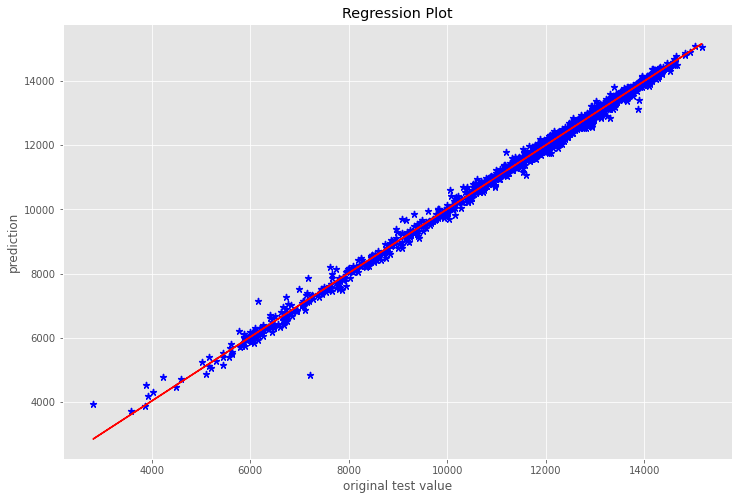

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
x, y = y_test, pred
plt.scatter(x, y, color='blue', marker=(5,2))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='r')
plt.xlabel("original test value")
plt.ylabel("prediction")
plt.title("Regression Plot")